In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('fish (1).csv')
data.head()

,Type,C1,C2,C3,C4,C5,C6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    85 non-null     object 
 1   C1      85 non-null     float64
 2   C2      85 non-null     float64
 3   C3      85 non-null     float64
 4   C4      85 non-null     float64
 5   C5      85 non-null     float64
 6   C6      85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB


In [ ]:
data.shape

(85, 7)

In [ ]:
data.describe()

,C1,C2,C3,C4,C5,C6
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [ ]:
data.head()

,Type,C1,C2,C3,C4,C5,C6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
data['Type'].value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: Type, dtype: int64

In [ ]:
data.isnull().sum()

Type    0
C1      0
C2      0
C3      0
C4      0
C5      0
C6      0
dtype: int64

In [ ]:
data["Type"] = data["Type"].map({"Bream" :"0","Roach":"1","Pike":"2","Smelt":"3"})

In [ ]:
data

,Type,C1,C2,C3,C4,C5,C6
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,2,950.0,48.3,51.7,55.1,16.2,11.2
81,2,1250.0,52.0,56.0,59.7,17.9,11.7
82,2,1600.0,56.0,60.0,64.0,15.0,9.6
83,2,1550.0,56.0,60.0,64.0,15.0,9.6


In [ ]:

##KMean Method - Elbow clustering
from sklearn.cluster import KMeans
x = data[['Type','C1','C2','C3',"C4","C5","C6"]]
x


,Type,C1,C2,C3,C4,C5,C6
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,2,950.0,48.3,51.7,55.1,16.2,11.2
81,2,1250.0,52.0,56.0,59.7,17.9,11.7
82,2,1600.0,56.0,60.0,64.0,15.0,9.6
83,2,1550.0,56.0,60.0,64.0,15.0,9.6


In [ ]:
typ1= data["Type"].value_counts()
typ1


0    34
1    20
2    17
3    14
Name: Type, dtype: int64

In [ ]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters = i,n_init=20)
    km.fit(x)
    css = km.inertia_
    print('Clusters =',i," wcss= ",css)
    wcss.append(css)

Clusters = 1  wcss=  12236588.611764703
Clusters = 2  wcss=  4415902.479384236
Clusters = 3  wcss=  1923768.928069381
Clusters = 4  wcss=  907348.2787777779
Clusters = 5  wcss=  525891.4941952615
Clusters = 6  wcss=  334301.9043408348
Clusters = 7  wcss=  224454.9836904762
Clusters = 8  wcss=  138421.64563492063
Clusters = 9  wcss=  98004.57261111113
Clusters = 10  wcss=  78900.72063492064


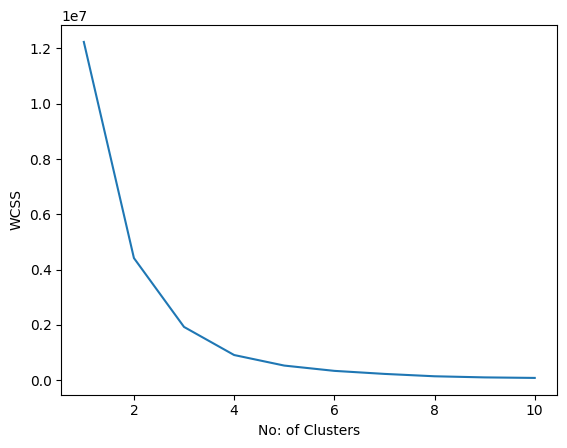

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel("No: of Clusters")
plt.ylabel("WCSS")
plt.show()


From above the cluster for our data is 3

In [ ]:
km1 = KMeans(n_clusters=3,n_init=10)
cluster_labels = km1.fit_predict(x)

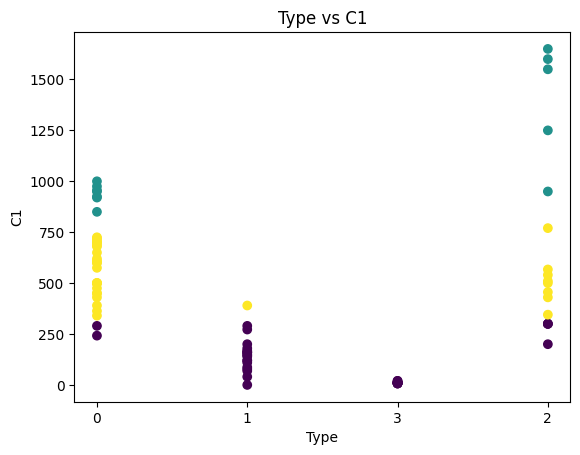

In [ ]:
plt.scatter(x['Type'],x['C1'],c=cluster_labels)
plt.xlabel('Type')
plt.ylabel('C1')
plt.title('Type vs C1')
plt.show()

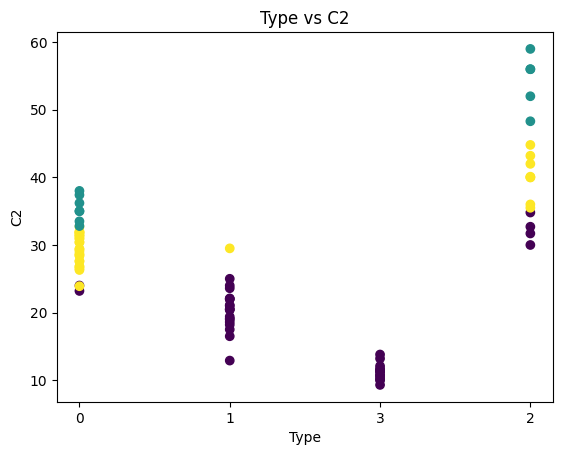

In [ ]:
plt.scatter(x['Type'],x['C2'],c=cluster_labels)
plt.xlabel('Type')
plt.ylabel('C2')
plt.title('Type vs C2')
plt.show()


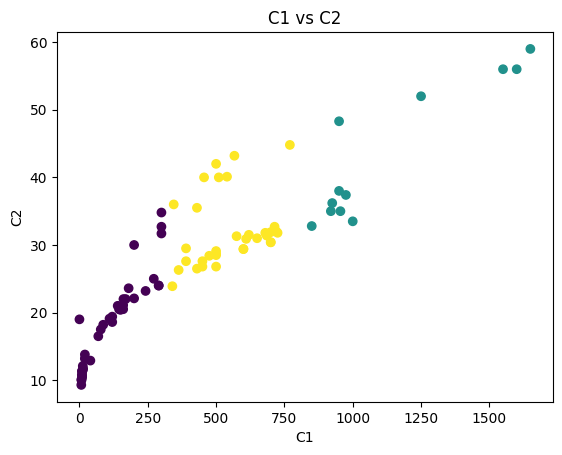

In [ ]:
plt.scatter(x['C1'],x['C2'],c=cluster_labels)
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('C1 vs C2')
plt.show()

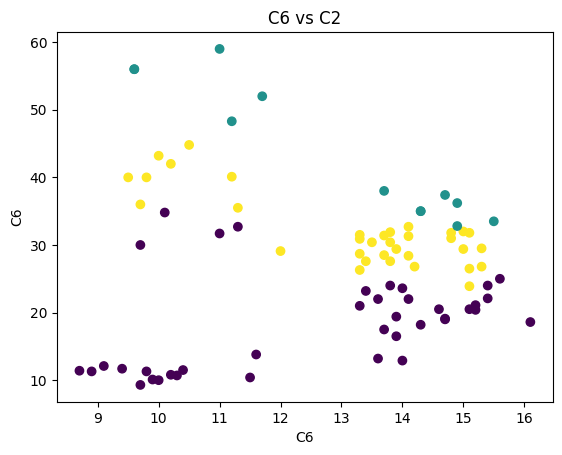

In [ ]:
plt.scatter(x['C6'],x['C2'],c=cluster_labels)
plt.xlabel('C6')
plt.ylabel('C6')
plt.title('C6 vs C2')
plt.show()

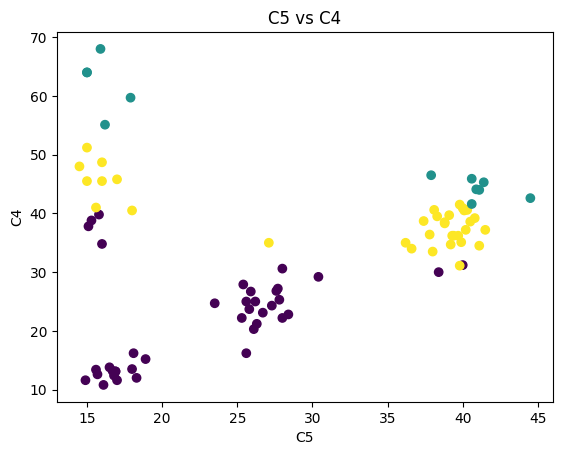

In [ ]:
plt.scatter(x['C5'],x['C4'],c=cluster_labels)
plt.xlabel('C5')
plt.ylabel('C4')
plt.title('C5 vs C4')
plt.show()
